In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler
import time
import math

sns.set()  # for plot styling
import numpy as np
from collections import defaultdict

from numpy import dot
from numpy.linalg import norm

def lineToTuple(line):
    # remove leading/trailing witespace and newlines
    cleanLine = line.strip()
    # get rid of quotes
    cleanLine = cleanLine.replace('"', '')
    # separate the fields
    lineList = cleanLine.split(",")
    # convert strings into numbers
    stringsToNumbers(lineList)
    lineTuple = tuple(lineList)
    return lineTuple

def stringsToNumbers(myList):
    for i in range(len(myList)):
        if (isValidNumberString(myList[i])):
            myList[i] = float(myList[i])

def isValidNumberString(s):
  if len(s) == 0:
    return False
  if  len(s) > 1 and s[0] == "-":
      s = s[1:]
  for c in s:
    if c not in "0123456789.":
      return False
  return True

def loadCSV(fileName):
    fileHandler = open(fileName, "rt")
    lines = fileHandler.readlines()
    fileHandler.close()
    del lines[0]  # remove the header
    dataset = []
    for line in lines:
        instance = lineToTuple(line)
        dataset.append(instance)
    return dataset

def euclidean_distance(point1, point2):
    distance = 0
    for a,b in zip(point1, point2):
        distance += pow((a-b), 2)
    return math.sqrt(distance)
def manhattan_distance(point1, point2):
    distance = 0
    for a,b in zip(point1, point2):
        distance += abs(a-b)
    return distance
def cosine_similarity(point1, point2):
  A = np.array(point1)
  B = np.array(point2)
  dist = 1 - np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
  return dist
def jaccard(A, B):
    return 1 - (np.sum(np.minimum(A,B), axis = 0)/np.sum(np.maximum(A, B), axis = 0)) 
def calculate_centroid(cluster):
  n = len(cluster[0])
  #if isinstance(cluster[0][-1], str):
  centroid = [0]*(n-1)

  for i in range(n-1):
    for point in cluster:
      centroid[i] += point[i]
    centroid[i] = centroid[i]/len(cluster)
  # else:
  #   centroid = [0]*n

  #   for i in range(n):
  #     for point in cluster:
  #       centroid[i] += point[i]
  #     centroid[i] = centroid[i]/len(cluster)

  
  return centroid
def draw_nd_scatter(clusters, centroid_centers):
  for key in clusters:
    x = []
    y = []
    cluster = clusters[key]
    for c in cluster:
      x.append(c[0])
      y.append(c[1])
    plt.scatter(x, y, marker='*', s=50, cmap='viridis')

  for point in centroid_centers:
    plt.scatter(point[0], point[1], c='black', s=200, alpha=0.5)
  
  plt.show()
def label_cluster(cluster):
  cl = defaultdict(int)
  for point in cluster:
    cl[point[-1]] += 1
  return cl
class KMeans:
  def __init__(self, n_clusters=10, max_iters=100, init_centroids=None, d_func=euclidean_distance, show_sse=False, show_first_centroid=False, centroid_stop=True):
    self.n_clusters = n_clusters
    self.max_iters = max_iters
    self.init_centroids = init_centroids
    self.d_func = d_func
    self.sse_list = []
    self.show_first_centroid = show_first_centroid
    self.show_sse = show_sse
    self.centroid_stop = centroid_stop

  def fit(self, data):
    start = time.time()
    if self.init_centroids is None:
      # Assign random points of data as centroids of size k (n_clusters)
      random_choice = np.random.choice(range(len(data)), self.n_clusters, replace=False)
      centroids = []

      for choice in random_choice:
        #if isinstance(data[choice][-1], str):
        centroids.append(data[choice][:-1])
        # else:
        #   centroids.append(data[choice])
      
      self.init_centroids = centroids
    
    for loop in range(self.max_iters): 
      clusters = defaultdict(list)
      sse = 0
      # Now, assign each point to nearest centroid cluster

      for point in data:
        temp_centroid = -1
        min_dist = 99999999
        for i, centroid in enumerate(self.init_centroids):
          # if isinstance(point[-1], str):
          d = self.d_func(point[:-1], centroid)
          # else:
          #   d = self.d_func(point, centroid)
          if d < min_dist:
            temp_centroid = i
            min_dist = d
        
        clusters[temp_centroid].append(point)

      prev_centroids = self.init_centroids.copy()
      # Now, recalculating the centroids
      for key in clusters.keys():
        cluster = clusters[key]
        self.init_centroids[key] = calculate_centroid(cluster)

      if loop == 1 and self.show_first_centroid == True:
        print("Centroids after first iteration: ", self.init_centroids)

      if self.centroid_stop == True and self.init_centroids == prev_centroids:
        print("Centroids converged at iteration ",loop)
        break

      # Now, calculate SSE
      for key in clusters.keys():
        cluster = clusters[key]
        ce = self.init_centroids[key]

        for p in cluster:
          sse += euclidean_distance(ce, p)**2

      if self.show_sse == True and loop > 1 and self.sse_list[-1] <= sse:
        self.sse_list.pop()
        break

      self.sse_list.append(sse)
      print("Iter ", loop," SSE: ",self.sse_list[-1])

    print("Time taken:", time.time() - start)
    print("Number of iterations:", loop)
    return [self.init_centroids, clusters]


In [12]:
raw_data = loadCSV('/content/sample_data/data.csv')

In [ ]:
raw_gth = loadCSV('/content/sample_data/label.csv')

In [ ]:
# raw_data=[int(i[-1]) for i in raw_data]
# for i in range(len(raw_data)):
#   raw_data[i][-1]=int(raw_data[i][-1])

type(raw_data[0])

tuple

In [5]:
original_labels = dict(label_cluster(raw_data))

In [6]:
original_labels[1]

1135

In [ ]:
original_labels[1]=original_labels[1.0]

In [13]:
kmeans = KMeans(max_iters=100)
[centroid_centers, clusters] = kmeans.fit(raw_data)

Iter  0  SSE:  28675466110.59906
Iter  1  SSE:  27064990468.12311
Iter  2  SSE:  26583895857.739685
Iter  3  SSE:  26273692714.630096
Iter  4  SSE:  26049885298.25263
Iter  5  SSE:  25892943490.00843
Iter  6  SSE:  25795948191.95612
Iter  7  SSE:  25742803676.27782
Iter  8  SSE:  25708899858.743134
Iter  9  SSE:  25682552969.80808
Iter  10  SSE:  25661069979.764545
Iter  11  SSE:  25639502441.868317
Iter  12  SSE:  25614948440.02618
Iter  13  SSE:  25580139302.376366
Iter  14  SSE:  25539862563.500187
Iter  15  SSE:  25503492899.939133
Iter  16  SSE:  25465923464.61291
Iter  17  SSE:  25433462433.989563
Iter  18  SSE:  25411860363.56866
Iter  19  SSE:  25392783779.78543
Iter  20  SSE:  25382980779.025616
Iter  21  SSE:  25377771328.584118
Iter  22  SSE:  25374256367.687187
Iter  23  SSE:  25371915167.40338
Iter  24  SSE:  25370409739.552166
Iter  25  SSE:  25369000755.075016
Iter  26  SSE:  25367498699.41856
Iter  27  SSE:  25366301453.09039
Iter  28  SSE:  25365037955.611187
Iter  29 

In [14]:
clusters.keys()

dict_keys([7, 8, 1, 6, 9, 5, 2, 0, 3, 4])

In [15]:
labels = {1: 0,2: 0,3: 0,4: 0,5: 0,6: 0,7: 0,8: 0,9:0}

for key in clusters:
  d = dict(label_cluster(clusters[key]))
  mx = 0
  s = 0
  label = ""
  for k in d:
    s += d[k]
    if d[k] > mx:
      mx = d[k]
      label = k
  labels[label] = mx

#draw_nd_scatter(clusters, centroid_centers)

print("SSE =",kmeans.sse_list)
print("Original Labels: ", original_labels)
print("Predicted Labels: ", labels)

total = 0
mismatch = 0

for l in original_labels:
  total += original_labels[l]
  mismatch += abs(original_labels[l] - labels[l])

accuracy = (total - mismatch) / total

print("Accuracy =",accuracy)

SSE = [28675466110.59906, 27064990468.12311, 26583895857.739685, 26273692714.630096, 26049885298.25263, 25892943490.00843, 25795948191.95612, 25742803676.27782, 25708899858.743134, 25682552969.80808, 25661069979.764545, 25639502441.868317, 25614948440.02618, 25580139302.376366, 25539862563.500187, 25503492899.939133, 25465923464.61291, 25433462433.989563, 25411860363.56866, 25392783779.78543, 25382980779.025616, 25377771328.584118, 25374256367.687187, 25371915167.40338, 25370409739.552166, 25369000755.075016, 25367498699.41856, 25366301453.09039, 25365037955.611187, 25362358151.00554, 25358318142.46599, 25353045537.519005, 25347488399.081234, 25342425100.064598, 25338772554.57718, 25336451705.281036, 25334424788.369656, 25333690673.745644, 25333031669.3054, 25332372051.88982, 25331704947.872875, 25330750488.520973, 25329820908.291355, 25328939023.933468, 25328202434.68658, 25327691742.07082, 25327112048.096306, 25326486797.433964, 25325828953.84773, 25324950138.35407, 25323870394.61905

477

In [19]:
kmeans = KMeans(max_iters=100,d_func=cosine_similarity)
[centroid_centers, clusters] = kmeans.fit(raw_data)

labels = {1: 0,2: 0,3: 0,4: 0,5: 0,6: 0,7: 0,8: 0,9:0}

for key in clusters:
  d = dict(label_cluster(clusters[key]))
  mx = 0
  s = 0
  label = ""
  for k in d:
    s += d[k]
    if d[k] > mx:
      mx = d[k]
      label = k
  labels[label] = mx

#draw_nd_scatter(clusters, centroid_centers)

print("SSE =",kmeans.sse_list)
print("Original Labels: ", original_labels)
print("Predicted Labels: ", labels)

total = 0
mismatch = 0

for l in original_labels:
  total += original_labels[l]
  mismatch += abs(original_labels[l] - labels[l])

accuracy = (total - mismatch) / total

print("Accuracy =",accuracy)

Iter  0  SSE:  28644139114.108402
Iter  1  SSE:  26804163192.193058
Iter  2  SSE:  26430510960.767475
Iter  3  SSE:  26217537310.52002
Iter  4  SSE:  26024807243.56958
Iter  5  SSE:  25869830999.351093
Iter  6  SSE:  25787082199.22651
Iter  7  SSE:  25751009189.80059
Iter  8  SSE:  25727322329.00962
Iter  9  SSE:  25711703139.0789
Iter  10  SSE:  25698004846.001633
Iter  11  SSE:  25685887600.006187
Iter  12  SSE:  25671838564.825775
Iter  13  SSE:  25658160080.971786
Iter  14  SSE:  25638586015.75249
Iter  15  SSE:  25616557873.241566
Iter  16  SSE:  25592386443.741535
Iter  17  SSE:  25570332754.31643
Iter  18  SSE:  25554691567.220234
Iter  19  SSE:  25539602051.09847
Iter  20  SSE:  25521616254.70622
Iter  21  SSE:  25503872401.007248
Iter  22  SSE:  25496265148.07739
Iter  23  SSE:  25493195231.546436
Iter  24  SSE:  25489973691.13108
Iter  25  SSE:  25488481474.161552
Iter  26  SSE:  25487904210.12092
Iter  27  SSE:  25487236715.651073
Iter  28  SSE:  25486633742.940777
Iter  29 

In [17]:
def draw_nd_scatter(clusters, centroid_centers):
  for key in clusters:
    x = []
    y = []
    cluster = clusters[key]
    for c in cluster:
      x.append(c[0])
      y.append(c[1])
    plt.scatter(x, y, marker='*', s=50, cmap='viridis')

  for point in centroid_centers:
    plt.scatter(point[0], point[1], c='black', s=200, alpha=0.5)
  
  plt.show()

Iter  0  SSE:  28242149473.368385
Iter  1  SSE:  27109945869.694836
Iter  2  SSE:  26623672170.321945
Iter  3  SSE:  26376831165.89339
Iter  4  SSE:  26280152649.19254
Iter  5  SSE:  26224066895.600357
Iter  6  SSE:  26156664009.5888
Iter  7  SSE:  26060907650.62939
Iter  8  SSE:  25895153921.249287
Iter  9  SSE:  25746397498.90653
Iter  10  SSE:  25670434931.648083
Iter  11  SSE:  25641177470.808388
Iter  12  SSE:  25627786576.124317
Iter  13  SSE:  25622976797.65269
Iter  14  SSE:  25613433624.306396
Iter  15  SSE:  25602516752.646305
Iter  16  SSE:  25594423581.53283
Iter  17  SSE:  25589991559.72272
Iter  18  SSE:  25585465094.104027
Iter  19  SSE:  25583285057.033737
Iter  20  SSE:  25580182925.66927
Iter  21  SSE:  25579054954.125214
Iter  22  SSE:  25580470969.568596
Iter  23  SSE:  25579042221.306553
Iter  24  SSE:  25581120348.084515
Iter  25  SSE:  25582064136.464672
Iter  26  SSE:  25581940445.988876
Iter  27  SSE:  25584133489.7669
Iter  28  SSE:  25584520246.66427
Iter  29

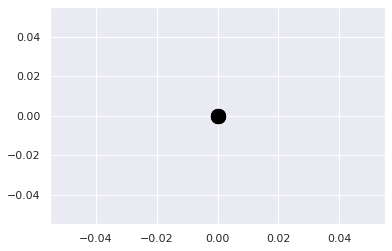

SSE = [28242149473.368385, 27109945869.694836, 26623672170.321945, 26376831165.89339, 26280152649.19254, 26224066895.600357, 26156664009.5888, 26060907650.62939, 25895153921.249287, 25746397498.90653, 25670434931.648083, 25641177470.808388, 25627786576.124317, 25622976797.65269, 25613433624.306396, 25602516752.646305, 25594423581.53283, 25589991559.72272, 25585465094.104027, 25583285057.033737, 25580182925.66927, 25579054954.125214, 25580470969.568596, 25579042221.306553, 25581120348.084515, 25582064136.464672, 25581940445.988876, 25584133489.7669, 25584520246.66427, 25584363572.1703, 25585233889.531033, 25585274168.63546, 25585108565.22703, 25585341501.2852, 25585324317.319607, 25585345837.538116, 25585441696.678196, 25585258924.063244, 25585052594.14939, 25585666419.481052, 25586422229.54146, 25586643403.32031, 25586935626.63363, 25587008694.696053, 25586929321.878407, 25587166816.77077, 25587461893.35552, 25587788220.540905, 25587561913.050865, 25587539737.376, 25587521921.805115, 2

In [20]:
kmeans = KMeans(max_iters=100,d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(raw_data)

labels = {1: 0,2: 0,3: 0,4: 0,5: 0,6: 0,7: 0,8: 0,9:0}

for key in clusters:
  d = dict(label_cluster(clusters[key]))
  mx = 0
  s = 0
  label = ""
  for k in d:
    s += d[k]
    if d[k] > mx:
      mx = d[k]
      label = k
  labels[label] = mx

#draw_nd_scatter(clusters, centroid_centers)

print("SSE =",kmeans.sse_list)
print("Original Labels: ", original_labels)
print("Predicted Labels: ", labels)

total = 0
mismatch = 0

for l in original_labels:
  total += original_labels[l]
  mismatch += abs(original_labels[l] - labels[l])

accuracy = (total - mismatch) / total

print("Accuracy =",accuracy)

In [23]:
kmeans = KMeans(max_iters=150,show_sse=True,centroid_stop=False)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Iter  0  SSE:  28111164601.177628
Iter  1  SSE:  26851196542.758965
Iter  2  SSE:  26415543052.853844
Iter  3  SSE:  26160728157.32315
Iter  4  SSE:  25938188130.34497
Iter  5  SSE:  25776349322.096092
Iter  6  SSE:  25681622360.81921
Iter  7  SSE:  25633227995.258236
Iter  8  SSE:  25604983568.852036
Iter  9  SSE:  25578745885.889843
Iter  10  SSE:  25550638247.46055
Iter  11  SSE:  25525873151.0079
Iter  12  SSE:  25507765070.981068
Iter  13  SSE:  25494838512.06022
Iter  14  SSE:  25486535367.01918
Iter  15  SSE:  25481613420.64457
Iter  16  SSE:  25478130177.18345
Iter  17  SSE:  25475445214.340942
Iter  18  SSE:  25472610360.413494
Iter  19  SSE:  25469299240.8959
Iter  20  SSE:  25465433948.913433
Iter  21  SSE:  25461825526.780483
Iter  22  SSE:  25456148034.309067
Iter  23  SSE:  25449289220.397617
Iter  24  SSE:  25441916211.93444
Iter  25  SSE:  25431759451.46371
Iter  26  SSE:  25421292703.148357
Iter  27  SSE:  25411098507.494484
Iter  28  SSE:  25402386013.278103
Iter  29 

In [24]:
kmeans = KMeans(max_iters=150,d_func=cosine_similarity,show_sse=True,centroid_stop=False)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Iter  0  SSE:  28716668753.44495
Iter  1  SSE:  27128278705.104935
Iter  2  SSE:  26710531981.78793
Iter  3  SSE:  26561246926.722355
Iter  4  SSE:  26437970154.48089
Iter  5  SSE:  26295350241.710728
Iter  6  SSE:  26132833584.940975
Iter  7  SSE:  25990341961.8566
Iter  8  SSE:  25882257081.500042
Iter  9  SSE:  25800009866.170025
Iter  10  SSE:  25738657609.987038
Iter  11  SSE:  25684704113.43268
Iter  12  SSE:  25649523788.311043
Iter  13  SSE:  25611412003.649193
Iter  14  SSE:  25576915502.955677
Iter  15  SSE:  25541932485.13246
Iter  16  SSE:  25514036417.821346
Iter  17  SSE:  25491424536.115845
Iter  18  SSE:  25475917836.733368
Iter  19  SSE:  25463648843.28018
Iter  20  SSE:  25456512502.36775
Iter  21  SSE:  25451741166.644398
Iter  22  SSE:  25444556279.747974
Iter  23  SSE:  25438228809.89598
Iter  24  SSE:  25435340721.77547
Iter  25  SSE:  25431805720.040653
Iter  26  SSE:  25429618932.690327
Iter  27  SSE:  25426048032.00429
Iter  28  SSE:  25424527644.00251
Iter  29

In [25]:
kmeans = KMeans(max_iters=150,d_func=jaccard,show_sse=True,centroid_stop=False)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Iter  0  SSE:  29848955946.800877
Iter  1  SSE:  27276593520.702194
Iter  2  SSE:  26498890863.647484
Iter  3  SSE:  26200964822.07677
Iter  4  SSE:  25995437943.202858
Iter  5  SSE:  25883456106.008865
Iter  6  SSE:  25833567836.00696
Iter  7  SSE:  25798705523.96856
Iter  8  SSE:  25769331410.862473
Iter  9  SSE:  25721311932.132793
Iter  10  SSE:  25663365507.43152
Iter  11  SSE:  25622976169.00954
Iter  12  SSE:  25597027913.480495
Iter  13  SSE:  25571350818.74958
Iter  14  SSE:  25548682191.117447
Iter  15  SSE:  25534909600.27172
Iter  16  SSE:  25524189567.776314
Iter  17  SSE:  25522926293.348602
Iter  18  SSE:  25519840898.254566
Time taken: 400.328720331192
Number of iterations: 19
[29848955946.800877, 27276593520.702194, 26498890863.647484, 26200964822.07677, 25995437943.202858, 25883456106.008865, 25833567836.00696, 25798705523.96856, 25769331410.862473, 25721311932.132793, 25663365507.43152, 25622976169.00954, 25597027913.480495, 25571350818.74958, 25548682191.117447, 255

In [27]:
kmeans = KMeans(max_iters=150, show_sse=False, centroid_stop=False)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Iter  0  SSE:  28648041417.13997
Iter  1  SSE:  26364138780.2869
Iter  2  SSE:  25747256433.01808
Iter  3  SSE:  25525894402.46404
Iter  4  SSE:  25423999090.24703
Iter  5  SSE:  25374552372.02773
Iter  6  SSE:  25348006850.1722
Iter  7  SSE:  25335461998.230625
Iter  8  SSE:  25329309626.978565
Iter  9  SSE:  25325410271.841595
Iter  10  SSE:  25322715617.952187
Iter  11  SSE:  25321049547.560886
Iter  12  SSE:  25320303467.61396
Iter  13  SSE:  25319895940.921204
Iter  14  SSE:  25319699076.788654
Iter  15  SSE:  25319405724.535877
Iter  16  SSE:  25319214688.221603
Iter  17  SSE:  25319134483.47099
Iter  18  SSE:  25318910853.046005
Iter  19  SSE:  25318662744.303146
Iter  20  SSE:  25318415145.81232
Iter  21  SSE:  25318216013.199486
Iter  22  SSE:  25318078004.271576
Iter  23  SSE:  25317977316.236248
Iter  24  SSE:  25317909067.395123
Iter  25  SSE:  25317776598.126778
Iter  26  SSE:  25317602102.665565
Iter  27  SSE:  25317512349.88293
Iter  28  SSE:  25317440874.31385
Iter  29 

In [28]:
kmeans = KMeans(max_iters=150, show_sse=False, centroid_stop=False,d_func=cosine_similarity)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Iter  0  SSE:  28619245621.207603
Iter  1  SSE:  27184151489.4903
Iter  2  SSE:  26896858851.720295
Iter  3  SSE:  26778041752.643482
Iter  4  SSE:  26659200435.29601
Iter  5  SSE:  26519377797.883442
Iter  6  SSE:  26354100094.093456
Iter  7  SSE:  26174705247.546223
Iter  8  SSE:  26006464653.251656
Iter  9  SSE:  25889066298.85428
Iter  10  SSE:  25833250229.840454
Iter  11  SSE:  25813427949.903362
Iter  12  SSE:  25801302516.059193
Iter  13  SSE:  25792218414.869286
Iter  14  SSE:  25783176426.927265
Iter  15  SSE:  25771098649.776268
Iter  16  SSE:  25753661347.695946
Iter  17  SSE:  25734466792.72412
Iter  18  SSE:  25700572449.377724
Iter  19  SSE:  25655799079.02307
Iter  20  SSE:  25611036249.840073
Iter  21  SSE:  25565657819.63652
Iter  22  SSE:  25530757625.842842
Iter  23  SSE:  25510987523.612846
Iter  24  SSE:  25499675961.4514
Iter  25  SSE:  25493936288.10019
Iter  26  SSE:  25493834471.15628
Iter  27  SSE:  25493430544.832817
Iter  28  SSE:  25490711390.852825
Iter  

In [29]:
kmeans = KMeans(max_iters=150, show_sse=False, centroid_stop=False,d_func=jaccard)
[centroid_centers, clusters] = kmeans.fit(raw_data)
print(kmeans.sse_list)

Iter  0  SSE:  28213980887.807583
Iter  1  SSE:  26828785166.00194
Iter  2  SSE:  26459931720.98268
Iter  3  SSE:  26203548289.7992
Iter  4  SSE:  25998604766.70327
Iter  5  SSE:  25837855417.39117
Iter  6  SSE:  25688050327.698437
Iter  7  SSE:  25570868346.14586
Iter  8  SSE:  25511153950.03779
Iter  9  SSE:  25464613720.11379
Iter  10  SSE:  25444819649.487255
Iter  11  SSE:  25434219319.086956
Iter  12  SSE:  25427032821.58375
Iter  13  SSE:  25422952076.33177
Iter  14  SSE:  25419029295.364895
Iter  15  SSE:  25419093920.39241
Iter  16  SSE:  25416941076.695686
Iter  17  SSE:  25417161313.113632
Iter  18  SSE:  25417754167.9722
Iter  19  SSE:  25416686072.547813
Iter  20  SSE:  25415476895.26785
Iter  21  SSE:  25414985116.295372
Iter  22  SSE:  25414999778.604004
Iter  23  SSE:  25415318461.76174
Iter  24  SSE:  25415692572.88941
Iter  25  SSE:  25415739220.63396
Iter  26  SSE:  25416175290.480007
Iter  27  SSE:  25416113145.07942
Iter  28  SSE:  25415848129.770054
Iter  29  SSE: